In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lazypredict
import pickle

In [2]:
# loading the dataset
df = pd.read_csv('FastagFraudDetection.csv')
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


# DATA CLEANING


In [3]:
df.isna().sum() 

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [5]:
# Removing colums that are not required
df_2 = df.drop(['Transaction_ID','FastagID','Vehicle_Plate_Number'], axis=1)
df_2

,Timestamp,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator
0,1/6/2023 11:20,Bus,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud
1,1/7/2023 14:55,Car,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud
2,1/8/2023 18:25,Motorcycle,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud
3,1/9/2023 2:05,Truck,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud
4,1/10/2023 6:35,Van,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud
...,...,...,...,...,...,...,...,...,...,...
4995,1/1/2023 22:18,Truck,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,Not Fraud
4996,1/17/2023 13:43,Van,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,Not Fraud
4997,2/5/2023 5:08,Sedan,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,Not Fraud
4998,2/20/2023 20:34,SUV,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,Not Fraud


In [6]:
df_2['Geographical_Location'].value_counts()

Geographical_Location
13.059816123454882, 77.77068662374292    1000
13.042660878688794, 77.47580097259879    1000
12.84197701525119, 77.67547528176169     1000
12.936687032945434, 77.53113977439017    1000
13.21331620748757, 77.55413526894684     1000
Name: count, dtype: int64

In [7]:
df_2['Timestamp'] = pd.to_datetime(df_2['Timestamp'])


In [8]:
df_2.isna().sum()

Timestamp                0
Vehicle_Type             0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Fraud_indicator          0
dtype: int64

In [9]:
df_2.isnull().sum()

Timestamp                0
Vehicle_Type             0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Fraud_indicator          0
dtype: int64

In [10]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              5000 non-null   datetime64[ns]
 1   Vehicle_Type           5000 non-null   object        
 2   TollBoothID            5000 non-null   object        
 3   Lane_Type              5000 non-null   object        
 4   Vehicle_Dimensions     5000 non-null   object        
 5   Transaction_Amount     5000 non-null   int64         
 6   Amount_paid            5000 non-null   int64         
 7   Geographical_Location  5000 non-null   object        
 8   Vehicle_Speed          5000 non-null   int64         
 9   Fraud_indicator        5000 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 390.8+ KB


**categorizing the features**

In [11]:
categorical_colums = df_2.select_dtypes(include = 'object').columns.to_list()
numerical_columns = df_2.select_dtypes(include = 'number').columns.to_list()
datetime_columns = df_2.select_dtypes(include = 'datetime64').columns.to_list()


print('categorical_colums:',categorical_colums)
print('numerical_columns:',numerical_columns)
print('datetime_columns:',datetime_columns)





categorical_colums: ['Vehicle_Type', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Geographical_Location', 'Fraud_indicator']
numerical_columns: ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']
datetime_columns: ['Timestamp']


In [12]:
for i in df_2.Vehicle_Type.value_counts():
    print (i) 

716
714
714
714
714
714
714


**Data Visualization**

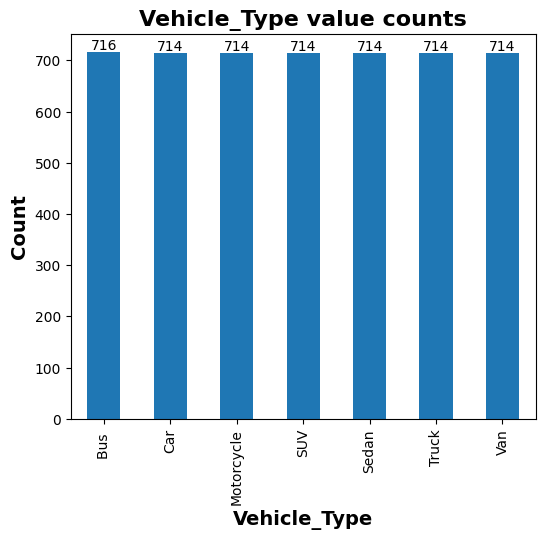

col_0         count  percentage
Vehicle_Type                   
Bus             716      0.1432
Car             714      0.1428
Motorcycle      714      0.1428
SUV             714      0.1428
Sedan           714      0.1428
Truck           714      0.1428
Van             714      0.1428


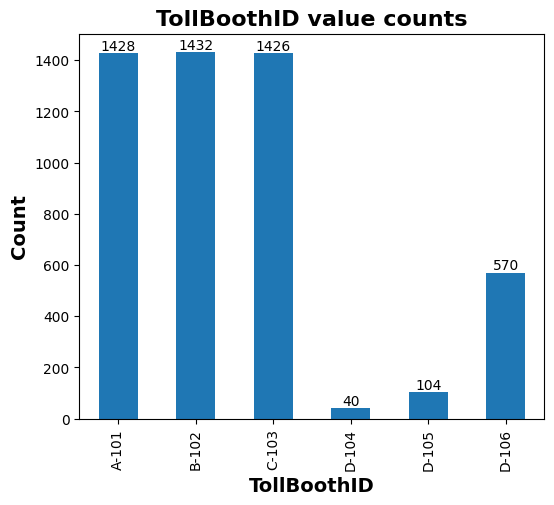

col_0        count  percentage
TollBoothID                   
A-101         1428      0.2856
B-102         1432      0.2864
C-103         1426      0.2852
D-104           40      0.0080
D-105          104      0.0208
D-106          570      0.1140


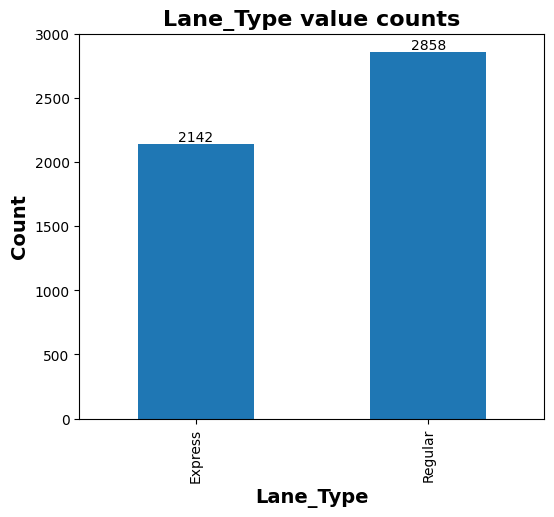

col_0      count  percentage
Lane_Type                   
Express     2142      0.4284
Regular     2858      0.5716


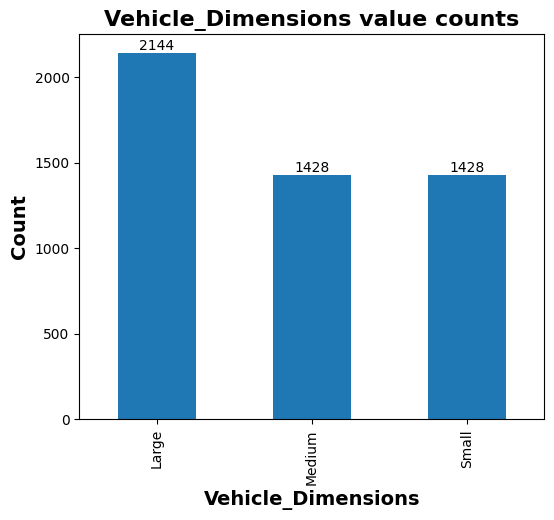

col_0               count  percentage
Vehicle_Dimensions                   
Large                2144      0.4288
Medium               1428      0.2856
Small                1428      0.2856


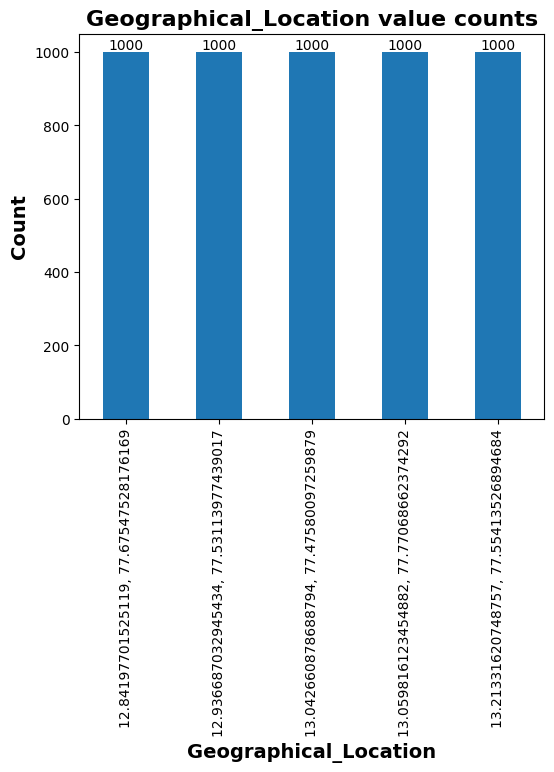

col_0                                  count  percentage
Geographical_Location                                   
12.84197701525119, 77.67547528176169    1000         0.2
12.936687032945434, 77.53113977439017   1000         0.2
13.042660878688794, 77.47580097259879   1000         0.2
13.059816123454882, 77.77068662374292   1000         0.2
13.21331620748757, 77.55413526894684    1000         0.2


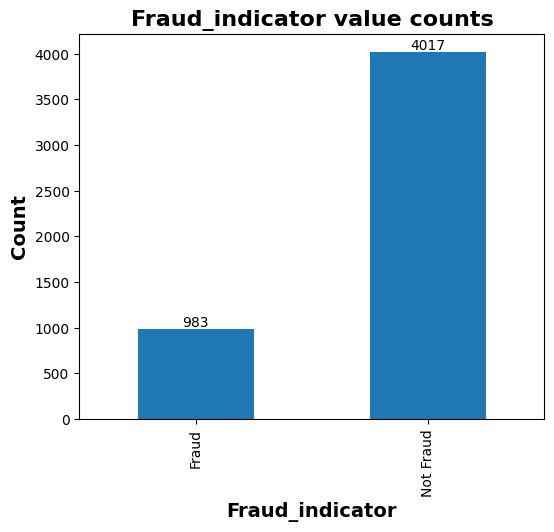

col_0            count  percentage
Fraud_indicator                   
Fraud              983      0.1966
Not Fraud         4017      0.8034


In [13]:
for i in categorical_colums:
    value_counts = df_2[i].value_counts()
    value_counts_sorted = value_counts.sort_index()
    

    plt.figure(figsize=(6, 5))
    plt.title(f'{i} value counts', fontsize=16, fontweight='bold')
    ax = value_counts_sorted.plot(kind='bar')
    ax.set_xlabel(i, fontsize=14, fontweight='bold')
    ax.set_ylabel('Count', fontsize=14, fontweight='bold')
    

    
    for x, (label, count) in enumerate(value_counts_sorted.items()):
        plt.text(x, count, str(count), ha='center', va='bottom')

    plt.show()

    frequency_table = pd.crosstab(index=df_2[i], columns='count')
    frequency_table['percentage'] = frequency_table['count'] / frequency_table['count'].sum()
    print(frequency_table)
    

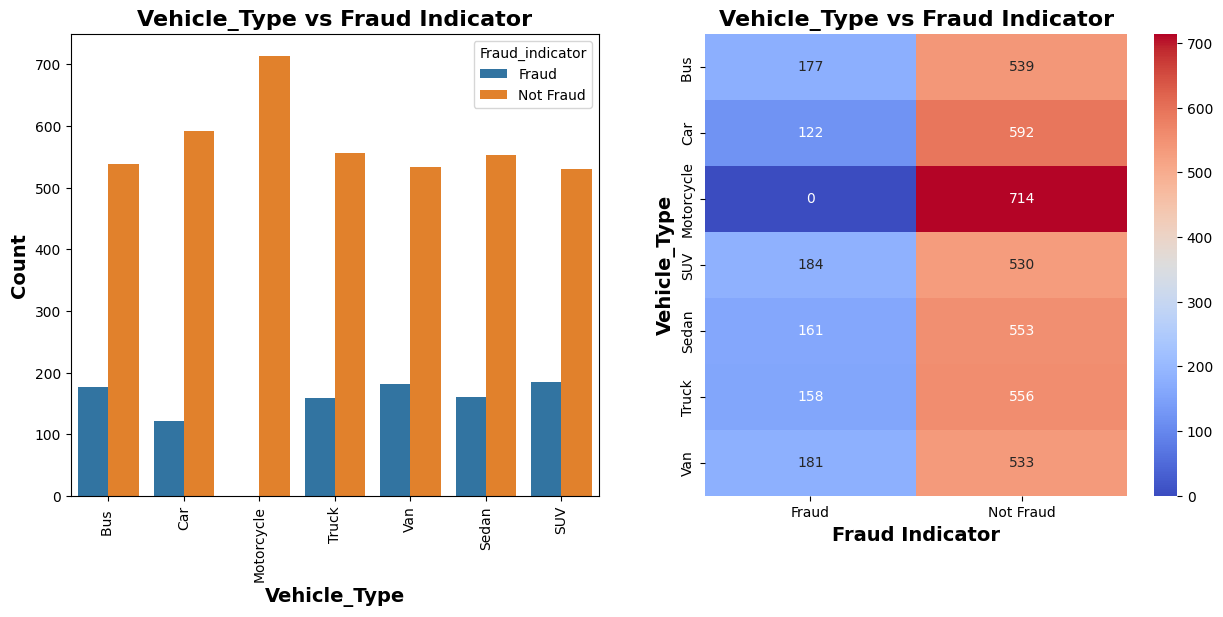

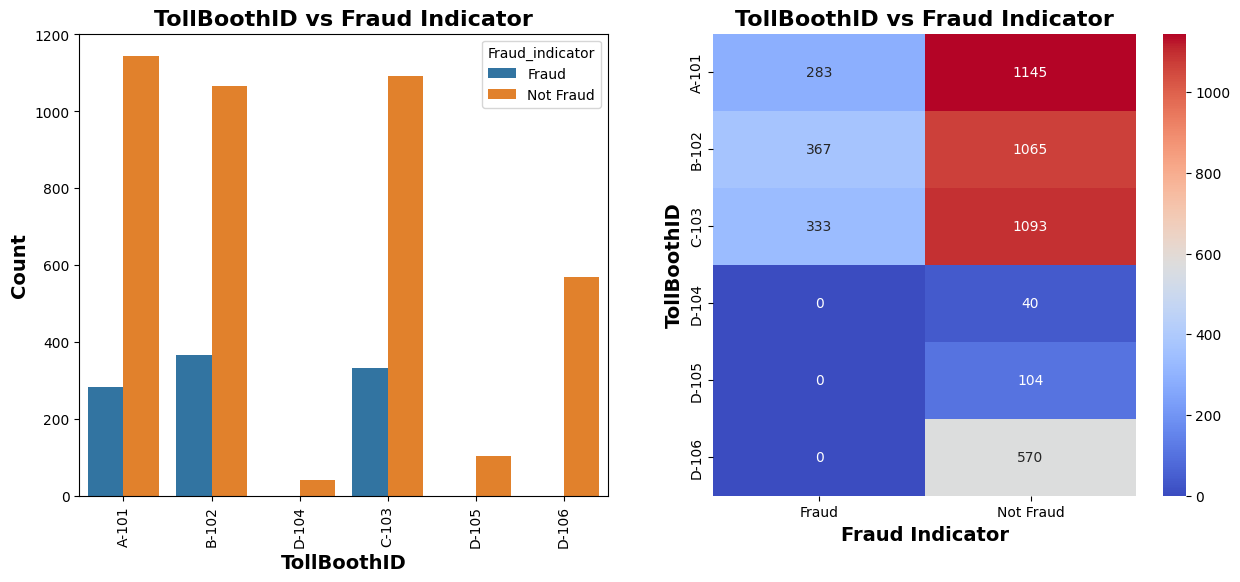

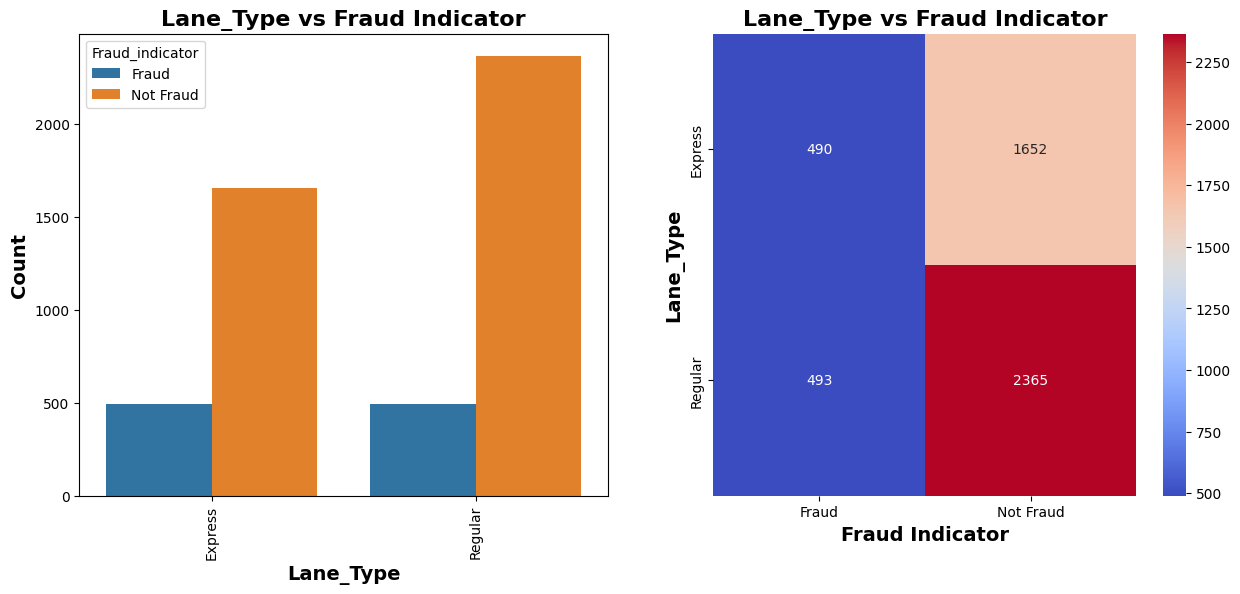

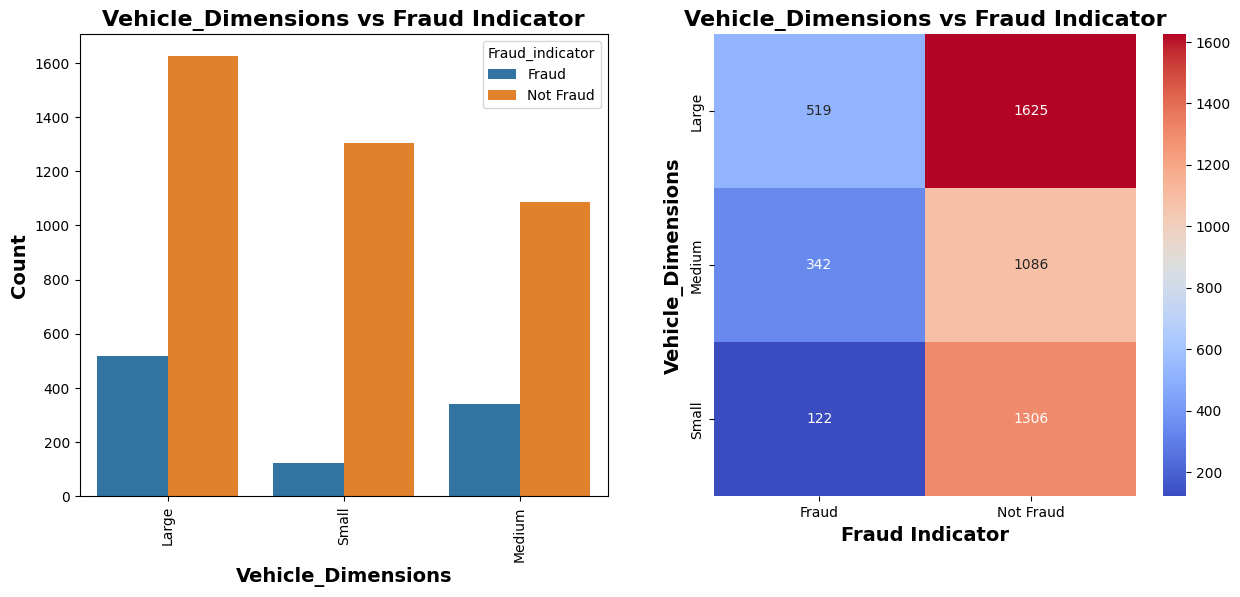

In [14]:
for i in categorical_colums[:4]:
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    sns.countplot(data=df_2, x=i, hue='Fraud_indicator')
    plt.xticks(rotation=90)
    plt.xlabel(i, fontsize=14, fontweight='bold')
    plt.ylabel('Count', fontsize=14, fontweight='bold')
    plt.title(f'{i} vs Fraud Indicator', fontsize=16, fontweight='bold')
    

    plt.subplot(1, 2, 2)
    frequency_table = pd.crosstab(index=df_2[i], columns=df_2['Fraud_indicator'])
    sns.heatmap(frequency_table, annot=True, cmap='coolwarm', fmt='d')
    plt.xlabel('Fraud Indicator', fontsize=14, fontweight='bold')
    plt.ylabel(i, fontsize=14, fontweight='bold')
    plt.title(f'{i} vs Fraud Indicator', fontsize=16, fontweight='bold')
    plt.show()





Text(0.5, 1.0, 'Geographical_Location vs Fraud Indicator')

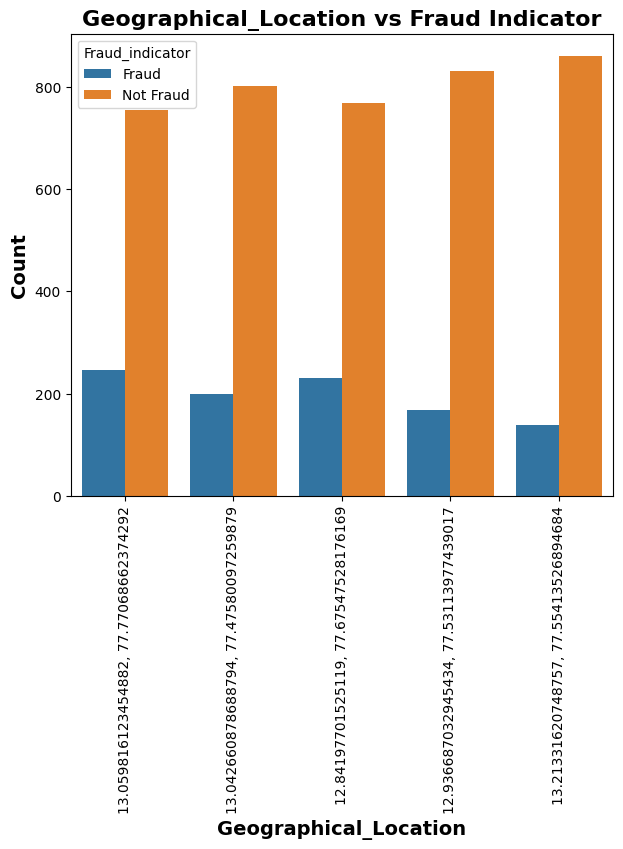

In [15]:
plt.figure(figsize=(7, 6))
sns.countplot(data=df_2, x='Geographical_Location', hue='Fraud_indicator')
plt.xticks(rotation=90)
plt.xlabel('Geographical_Location', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Geographical_Location vs Fraud Indicator', fontsize=16, fontweight='bold')

Text(0.5, 1.0, 'Geographical_Location vs Fraud Indicator')

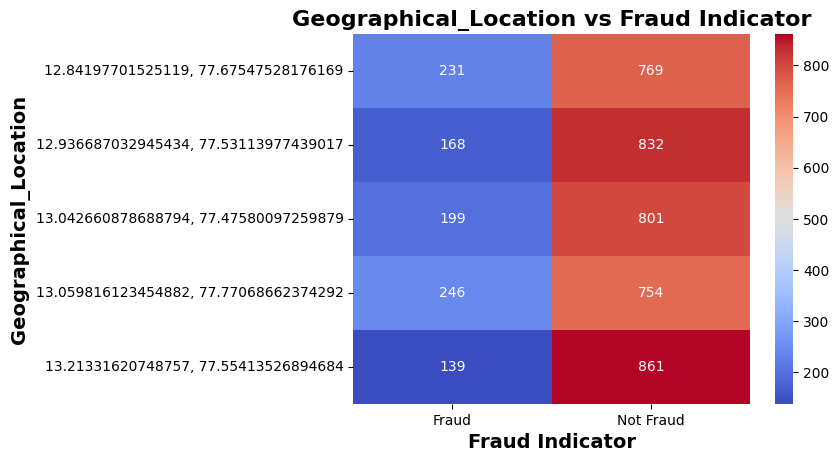

In [16]:
frequency_table = pd.crosstab(index=df_2['Geographical_Location'], columns=df_2['Fraud_indicator'])
sns.heatmap(frequency_table, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Fraud Indicator', fontsize=14, fontweight='bold')
plt.ylabel('Geographical_Location', fontsize=14, fontweight='bold')
plt.title( 'Geographical_Location vs Fraud Indicator', fontsize=16, fontweight='bold')

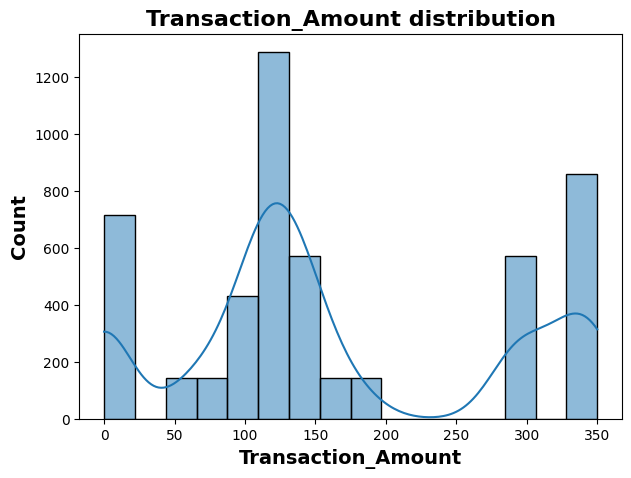

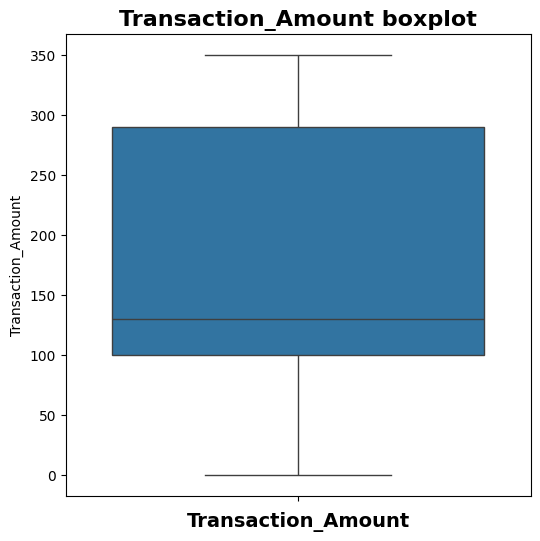

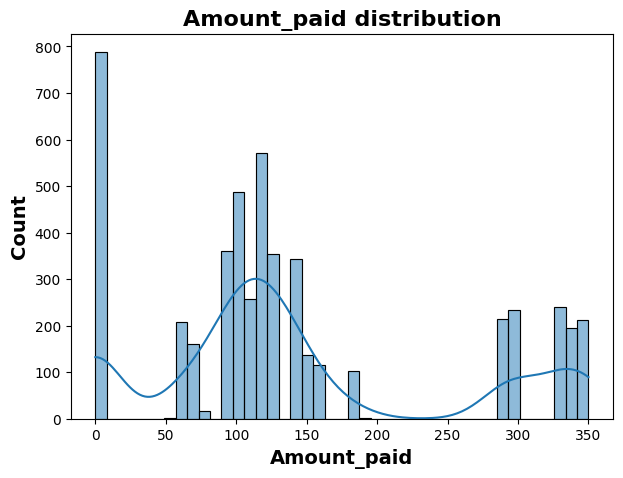

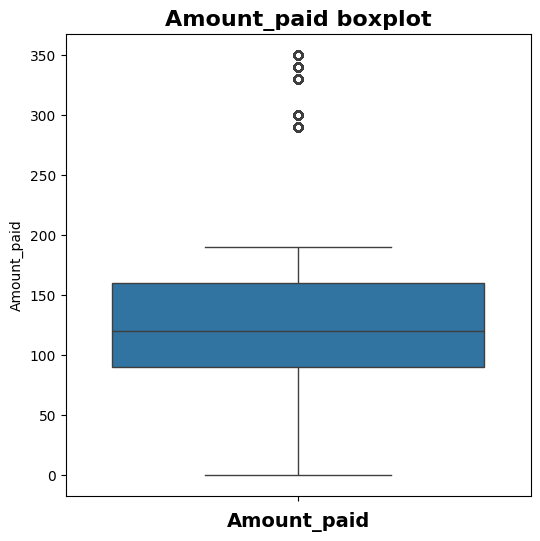

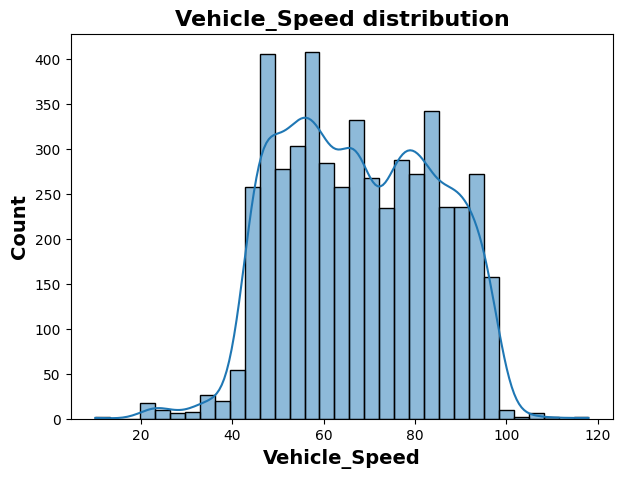

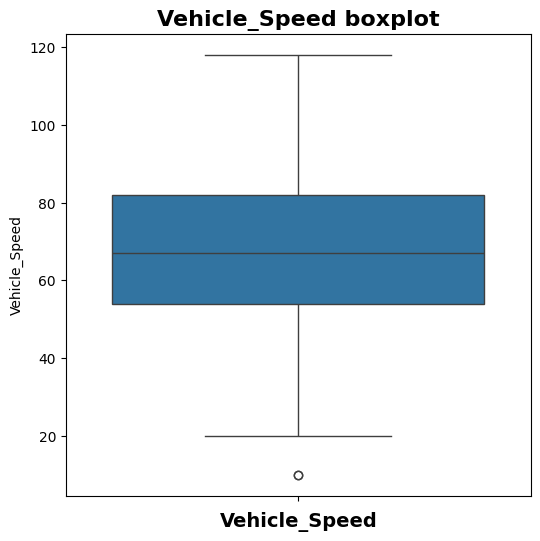

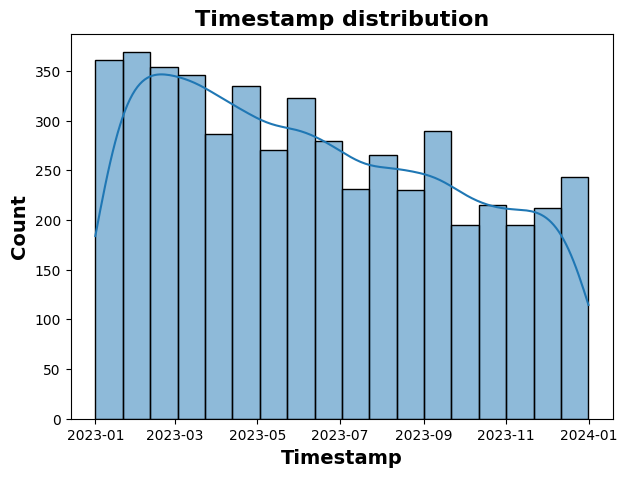

In [17]:
for i in numerical_columns:
    plt.figure(figsize=(7, 5))
    plt.title(f'{i} distribution', fontsize=16, fontweight='bold')
    sns.histplot(df_2[i], kde=True)
    plt.xlabel(i, fontsize=14, fontweight='bold')
    plt.ylabel('Count', fontsize=14, fontweight='bold')
    plt.show()

    plt.figure(figsize=(6, 6))
    plt.title(f'{i} boxplot', fontsize=16, fontweight='bold')
    sns.boxplot(df_2[i])
    plt.xlabel(i, fontsize=14, fontweight='bold')
    plt.show()

for i in datetime_columns:
    plt.figure(figsize=(7, 5))
    plt.title(f'{i} distribution', fontsize=16, fontweight='bold')
    sns.histplot(df_2[i], kde=True)
    plt.xlabel(i, fontsize=14, fontweight='bold')
    plt.ylabel('Count', fontsize=14, fontweight='bold')
    plt.show()
    
    


# DATA CONVERSION

In [18]:
df_2

,Timestamp,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator
0,2023-01-06 11:20:00,Bus,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud
1,2023-01-07 14:55:00,Car,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud
2,2023-01-08 18:25:00,Motorcycle,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud
3,2023-01-09 02:05:00,Truck,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud
4,2023-01-10 06:35:00,Van,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud
...,...,...,...,...,...,...,...,...,...,...
4995,2023-01-01 22:18:00,Truck,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,Not Fraud
4996,2023-01-17 13:43:00,Van,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,Not Fraud
4997,2023-02-05 05:08:00,Sedan,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,Not Fraud
4998,2023-02-20 20:34:00,SUV,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,Not Fraud


In [19]:
df_2['Year'] = df_2['Timestamp'].dt.year
df_2['Month'] = df_2['Timestamp'].dt.month
df_2['Day'] = df_2['Timestamp'].dt.day
df_2['Hour'] = df_2['Timestamp'].dt.hour
df_2['Minute'] = df_2['Timestamp'].dt.minute
df_2['Second'] = df_2['Timestamp'].dt.second

df_2.drop('Timestamp', axis=1, inplace=True)


In [20]:
df_2

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator,Year,Month,Day,Hour,Minute,Second
0,Bus,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud,2023,1,6,11,20,0
1,Car,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud,2023,1,7,14,55,0
2,Motorcycle,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud,2023,1,8,18,25,0
3,Truck,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud,2023,1,9,2,5,0
4,Van,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud,2023,1,10,6,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Truck,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,Not Fraud,2023,1,1,22,18,0
4996,Van,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,Not Fraud,2023,1,17,13,43,0
4997,Sedan,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,Not Fraud,2023,2,5,5,8,0
4998,SUV,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,Not Fraud,2023,2,20,20,34,0


In [21]:
X = df_2.drop('Fraud_indicator', axis=1)
y = df_2['Fraud_indicator']

In [22]:
X = pd.get_dummies(X, dtype='int64')
y = y.map({'Fraud': 1, 'Not Fraud': 0})


display(X, y)

,Transaction_Amount,Amount_paid,Vehicle_Speed,Year,Month,Day,Hour,Minute,Second,Vehicle_Type_Bus,...,Lane_Type_Express,Lane_Type_Regular,Vehicle_Dimensions_Large,Vehicle_Dimensions_Medium,Vehicle_Dimensions_Small,"Geographical_Location_12.84197701525119, 77.67547528176169","Geographical_Location_12.936687032945434, 77.53113977439017","Geographical_Location_13.042660878688794, 77.47580097259879","Geographical_Location_13.059816123454882, 77.77068662374292","Geographical_Location_13.21331620748757, 77.55413526894684"
0,350,120,65,2023,1,6,11,20,0,1,...,1,0,1,0,0,0,0,0,1,0
1,120,100,78,2023,1,7,14,55,0,0,...,0,1,0,0,1,0,0,0,1,0
2,0,0,53,2023,1,8,18,25,0,0,...,0,1,0,0,1,0,0,0,1,0
3,350,120,92,2023,1,9,2,5,0,0,...,0,1,1,0,0,0,0,0,1,0
4,140,100,60,2023,1,10,6,35,0,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,330,330,81,2023,1,1,22,18,0,0,...,0,1,1,0,0,0,0,0,0,1
4996,125,125,64,2023,1,17,13,43,0,0,...,1,0,0,1,0,0,0,0,0,1
4997,115,115,93,2023,2,5,5,8,0,0,...,0,1,0,1,0,0,0,0,0,1
4998,145,145,57,2023,2,20,20,34,0,0,...,1,0,1,0,0,0,0,0,0,1


0       1
1       1
2       0
3       1
4       1
       ..
4995    0
4996    0
4997    0
4998    0
4999    1
Name: Fraud_indicator, Length: 5000, dtype: int64

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 32 columns):
 #   Column                                                       Non-Null Count  Dtype
---  ------                                                       --------------  -----
 0   Transaction_Amount                                           5000 non-null   int64
 1   Amount_paid                                                  5000 non-null   int64
 2   Vehicle_Speed                                                5000 non-null   int64
 3   Year                                                         5000 non-null   int32
 4   Month                                                        5000 non-null   int32
 5   Day                                                          5000 non-null   int32
 6   Hour                                                         5000 non-null   int32
 7   Minute                                                       5000 non-null   int32
 8   Second  

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
X_scaled

,Transaction_Amount,Amount_paid,Vehicle_Speed,Year,Month,Day,Hour,Minute,Second,Vehicle_Type_Bus,...,Lane_Type_Express,Lane_Type_Regular,Vehicle_Dimensions_Large,Vehicle_Dimensions_Medium,Vehicle_Dimensions_Small,"Geographical_Location_12.84197701525119, 77.67547528176169","Geographical_Location_12.936687032945434, 77.53113977439017","Geographical_Location_13.042660878688794, 77.47580097259879","Geographical_Location_13.059816123454882, 77.77068662374292","Geographical_Location_13.21331620748757, 77.55413526894684"
0,1.680364,-0.199689,-0.171802,0.0,-1.423271,-1.110868,-0.081094,-0.478528,0.0,2.446066,...,1.155105,-1.155105,1.154162,-0.632278,-0.632278,-0.5,-0.5,-0.5,2.0,-0.5
1,-0.365195,-0.387535,0.611525,0.0,-1.423271,-0.997005,0.358998,1.588522,0.0,-0.408820,...,-0.865722,0.865722,-0.866430,-0.632278,1.581582,-0.5,-0.5,-0.5,2.0,-0.5
2,-1.432443,-1.326764,-0.894872,0.0,-1.423271,-0.883142,0.945789,-0.183235,0.0,-0.408820,...,-0.865722,0.865722,-0.866430,-0.632278,1.581582,-0.5,-0.5,-0.5,2.0,-0.5
3,1.680364,-0.199689,1.455108,0.0,-1.423271,-0.769280,-1.401373,-1.364407,0.0,-0.408820,...,-0.865722,0.865722,1.154162,-0.632278,-0.632278,-0.5,-0.5,-0.5,2.0,-0.5
4,-0.187320,-0.387535,-0.473081,0.0,-1.423271,-0.655417,-0.814582,0.407351,0.0,-0.408820,...,1.155105,-1.155105,-0.866430,1.581582,-0.632278,-0.5,-0.5,-0.5,2.0,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.502490,1.772691,0.792293,0.0,-1.423271,-1.680182,1.532579,-0.596645,0.0,-0.408820,...,-0.865722,0.865722,1.154162,-0.632278,-0.632278,-0.5,-0.5,-0.5,-0.5,2.0
4996,-0.320726,-0.152728,-0.232057,0.0,-1.423271,0.141622,0.212301,0.879819,0.0,-0.408820,...,1.155105,-1.155105,-0.866430,1.581582,-0.632278,-0.5,-0.5,-0.5,-0.5,2.0
4997,-0.409663,-0.246651,1.515363,0.0,-1.132345,-1.224731,-0.961280,-1.187231,0.0,-0.408820,...,-0.865722,0.865722,-0.866430,1.581582,-0.632278,-0.5,-0.5,-0.5,-0.5,2.0
4998,-0.142851,0.035118,-0.653849,0.0,-1.132345,0.483211,1.239184,0.348292,0.0,-0.408820,...,1.155105,-1.155105,1.154162,-0.632278,-0.632278,-0.5,-0.5,-0.5,-0.5,2.0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((4000, 32), (1000, 32), (4000,), (1000,))

In [26]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

**USING LAZYPRICT TO ACCESS 42 MODELS**

In [27]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

In [28]:
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

  0%|          | 0/29 [00:00<?, ?it/s]

 97%|█████████▋| 28/29 [00:24<00:00,  1.56it/s]

[LightGBM] [Info] Number of positive: 766, number of negative: 3234
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.191500 -> initscore=-1.440293
[LightGBM] [Info] Start training from score -1.440293


100%|██████████| 29/29 [00:24<00:00,  1.17it/s]


In [29]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.08
LGBMClassifier,1.00,1.00,1.00,1.00,0.52
BaggingClassifier,1.00,1.00,1.00,1.00,0.22
XGBClassifier,1.00,0.99,0.99,1.00,0.77
LinearSVC,0.98,0.96,0.96,0.98,1.32
ExtraTreesClassifier,0.98,0.95,0.95,0.98,2.11
RandomForestClassifier,0.98,0.95,0.95,0.98,1.46
SGDClassifier,0.98,0.95,0.95,0.98,0.11
Perceptron,0.97,0.94,0.94,0.97,0.10


**COMFIRMING THE RESULT OF THE TOP 5 MODELS**

In [30]:
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix,roc_auc_score,roc_curve

In [31]:
models = [DecisionTreeClassifier(),
          LGBMClassifier(),
          BaggingClassifier(),
          XGBClassifier(),
          LinearSVC()]
mod = []
pre = []
rec = []
f = []
acc = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    mod.append(model)
    pre.append(precision)
    rec.append(recall)
    f.append(f1)
    acc.append(accuracy)
df = pd.DataFrame({'Model': mod, 'Precision': pre, 'Recall': rec, 'F1': f, 'Accuracy': acc})
df.sort_values('Accuracy', ascending=False, inplace=True)

[LightGBM] [Info] Number of positive: 766, number of negative: 3234
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.191500 -> initscore=-1.440293
[LightGBM] [Info] Start training from score -1.440293


In [32]:
df

,Model,Precision,Recall,F1,Accuracy
1,LGBMClassifier(),1.00,0.99,1.00,1.00
0,DecisionTreeClassifier(),0.99,1.00,0.99,1.00
2,(DecisionTreeClassifier(random_state=404745926...,1.00,0.99,0.99,1.00
3,"XGBClassifier(base_score=None, booster=None, c...",1.00,0.99,0.99,1.00
4,LinearSVC(),1.00,0.92,0.96,0.98


**VISUALIZATION OF TOP 10 MODELS**

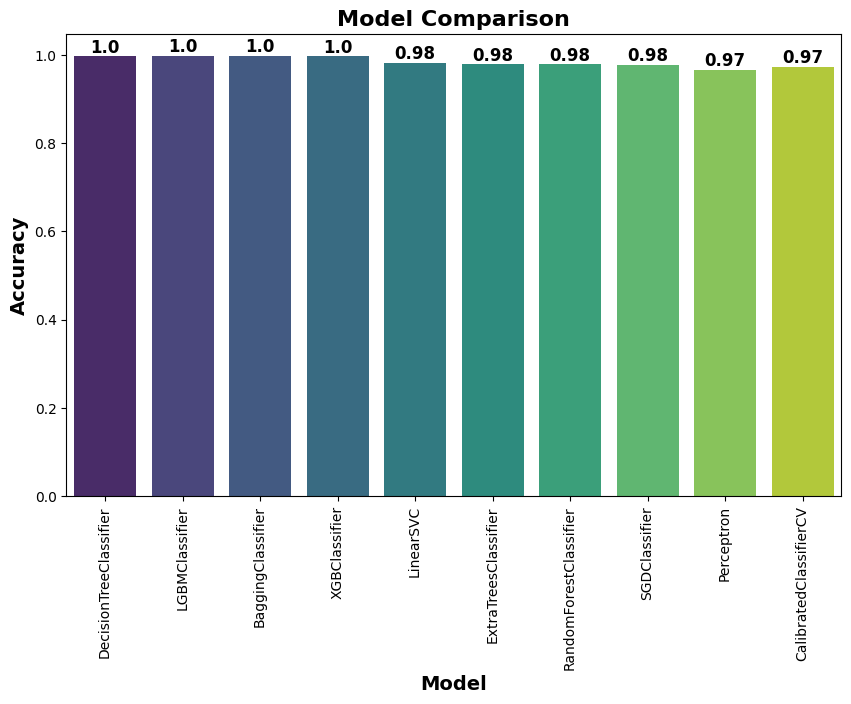

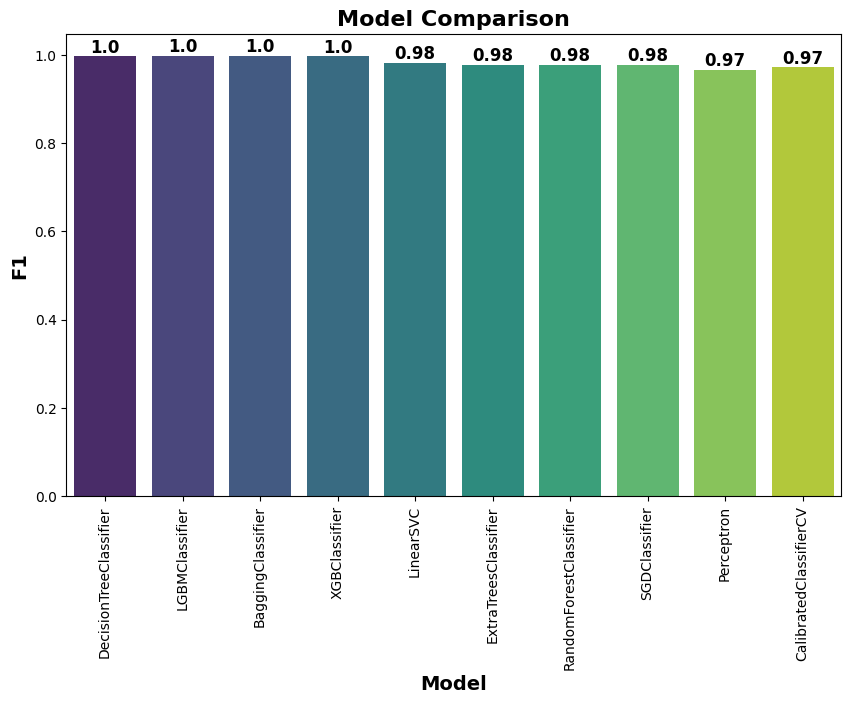

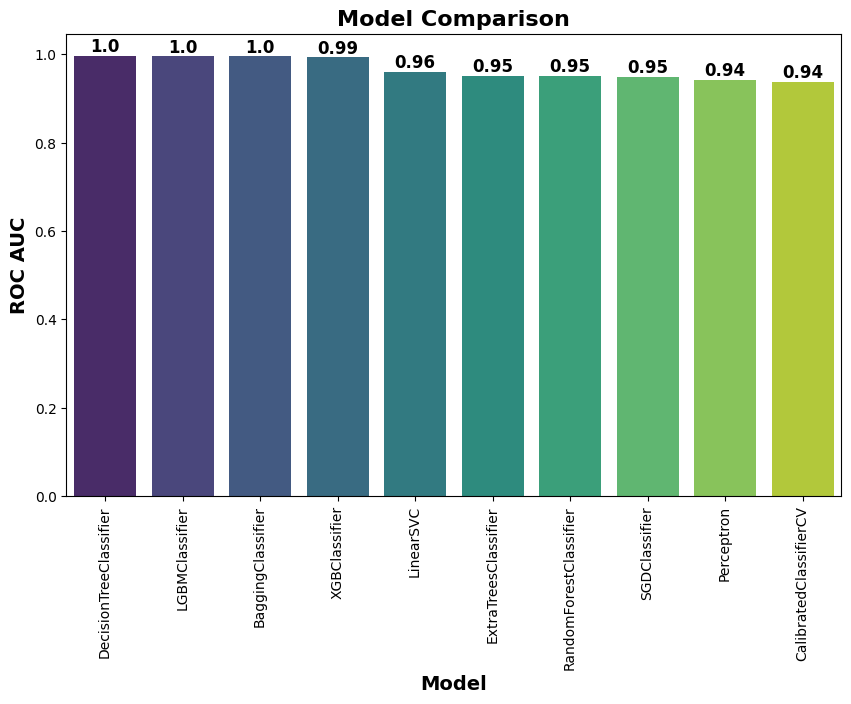

In [33]:
models = predictions[:10]

plt.figure(figsize=(10, 6))
plt.title('Model Comparison', fontsize=16, fontweight='bold')
sns.barplot(data=models, x='Model', y='Accuracy', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Model', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
for x, y in enumerate(models['Accuracy']):
    plt.text(x, y, round(y, 2), ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.show()

plt.figure(figsize=(10, 6))
plt.title('Model Comparison', fontsize=16, fontweight='bold')
sns.barplot(data=models, x='Model', y='F1 Score', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Model', fontsize=14, fontweight='bold')
plt.ylabel('F1', fontsize=14, fontweight='bold')
for x, y in enumerate(models['F1 Score']):
    plt.text(x, y, round(y, 2), ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.show()

plt.figure(figsize=(10, 6))
plt.title('Model Comparison', fontsize=16, fontweight='bold')
sns.barplot(data=models, x='Model', y='ROC AUC', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Model', fontsize=14, fontweight='bold')
plt.ylabel('ROC AUC', fontsize=14, fontweight='bold')
for x, y in enumerate(models['ROC AUC']):
    plt.text(x, y, round(y, 2), ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.show()





# THE BEST MODEL(DecisionTreeClassifier)

In [34]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')
print(f'Accuracy: {accuracy}')
print(f'ROC AUC: {roc_auc}')
print(f'Confusion Matrix: {conf_matrix}')



Precision: 1.0
Recall: 0.9953917050691244
F1: 0.997690531177829
Accuracy: 0.999
ROC AUC: 0.9976958525345623
Confusion Matrix: [[783   0]
 [  1 216]]


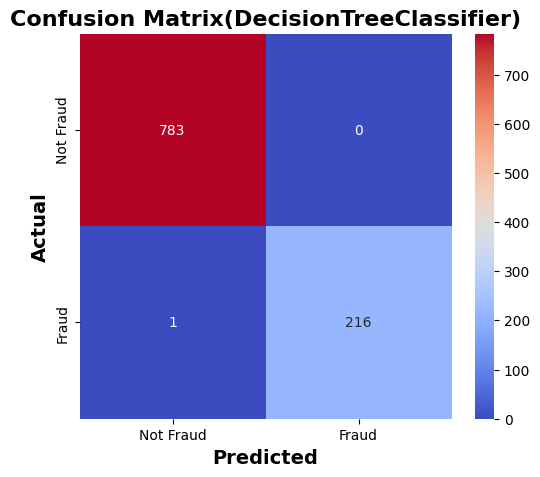

In [35]:
conf_matrix = pd.DataFrame(conf_matrix, index=['Not Fraud', 'Fraud'], columns=['Not Fraud', 'Fraud'])
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix(DecisionTreeClassifier)', fontsize=16, fontweight='bold')
plt.show()




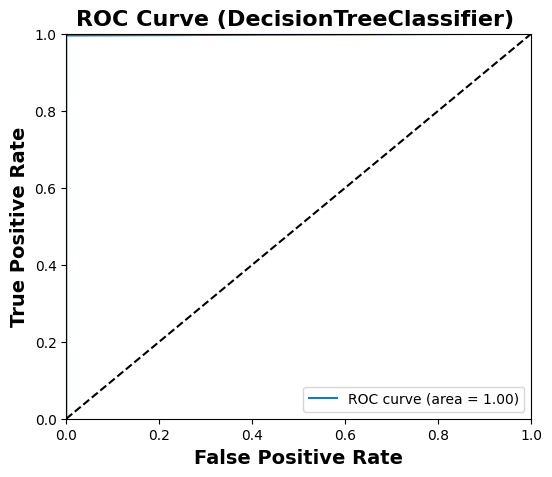

In [36]:
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('ROC Curve (DecisionTreeClassifier) ', fontsize=16, fontweight='bold')
plt.legend(loc='lower right')
plt.show()

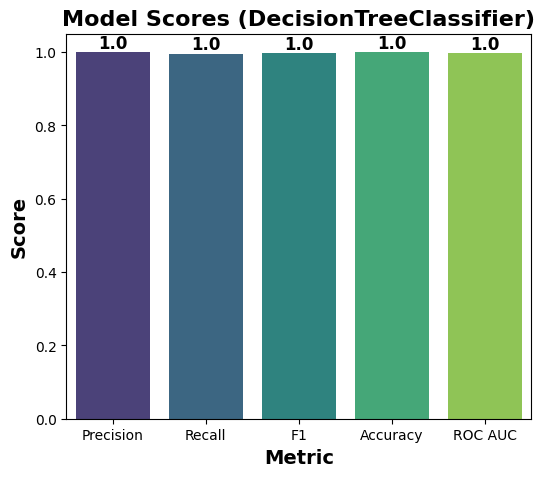

In [37]:
scores = [precision, recall, f1, accuracy, roc_auc]
plt.figure(figsize=(6, 5))
plt.title('Model Scores (DecisionTreeClassifier)', fontsize=16, fontweight='bold')
sns.barplot(x=['Precision', 'Recall', 'F1', 'Accuracy', 'ROC AUC'], y=scores, palette='viridis')
plt.xlabel('Metric', fontsize=14, fontweight='bold')
plt.ylabel('Score', fontsize=14, fontweight='bold')
for x, y in enumerate(scores):
    plt.text(x, y, round(y, 2), ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.show()

**CROSS VALIDATION OF THE TEST SET FOR THE BEST MODEL**

In [38]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

Scores: [0.9925 0.99   1.     0.99   0.99   0.9975 0.9925 0.995  1.     0.9975]
Mean Accuracy: 0.9945


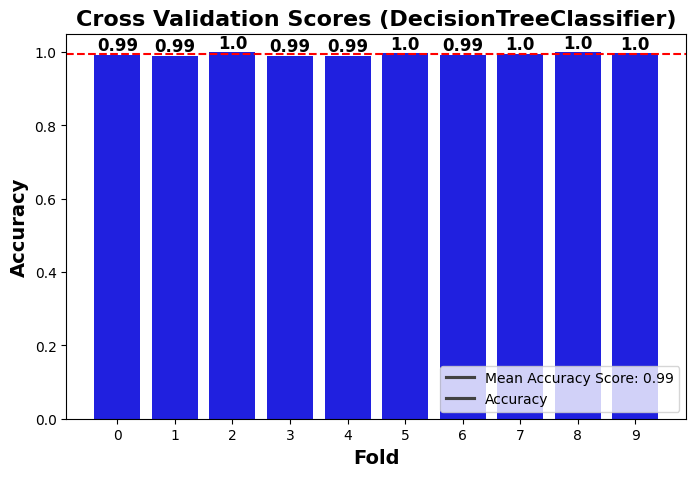

In [39]:
k = 10
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
model = DecisionTreeClassifier()
scores = cross_val_score(model, X_train,y_train, cv=cv, scoring = 'accuracy')
print('Scores:', scores)
print('Mean Accuracy:', scores.mean())
plt.figure(figsize=(8, 5))
plt.title('Cross Validation Scores (DecisionTreeClassifier)', fontsize=16, fontweight='bold')
sns.barplot(x=[i for i in range(k)], y=scores, color='blue')
plt.axline((0, scores.mean()), (1, scores.mean()), color='red', linestyle='--')
plt.legend([f'Mean Accuracy Score: {round(scores.mean(),2)}', 'Accuracy'], loc='lower right')
plt.xlabel('Fold', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
for x, y in enumerate(scores):
    plt.text(x, y, round(y, 2), ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.show()



Scores: [0.99691358 0.98375569 1.         0.99187784 0.985465   0.99690402
 0.99195851 0.99195851 1.         0.99350649]
Mean ROC AUC: 0.9932339637963992


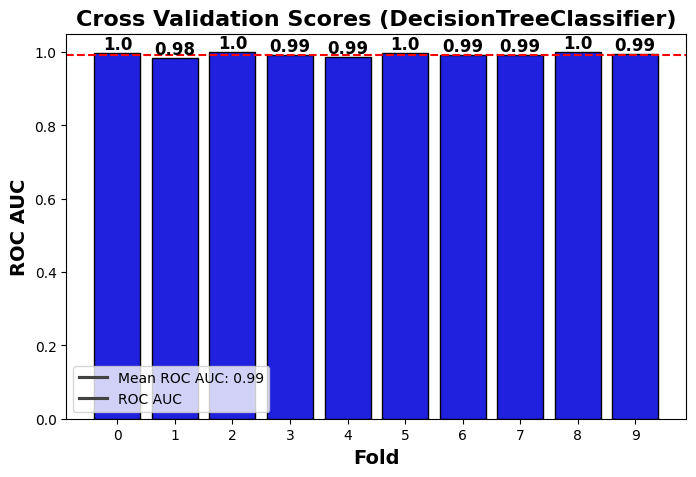

In [40]:
k = 10
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
model = DecisionTreeClassifier()
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
print('Scores:', scores)
print('Mean ROC AUC:', scores.mean())
plt.figure(figsize=(8, 5))
plt.title('Cross Validation Scores (DecisionTreeClassifier)', fontsize=16, fontweight='bold')
sns.barplot(x=[i for i in range(k)], y=scores, color='blue',edgecolor='black')
plt.axline((0, scores.mean()), (1, scores.mean()), color='red', linestyle='--')
plt.legend([f'Mean ROC AUC: {round(scores.mean(),2)}', 'ROC AUC'])
plt.xlabel('Fold', fontsize=14, fontweight='bold')
plt.ylabel('ROC AUC', fontsize=14, fontweight='bold')
for x, y in enumerate(scores):
    plt.text(x, y, round(y, 2), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()


# FEATURE IMPORTANCE 

In [41]:
def dataframe(df):
    if 'Timestamp' in df.columns:
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        df['Year'] = df['Timestamp'].dt.year
        df['Month'] = df['Timestamp'].dt.month
        df['Day'] = df['Timestamp'].dt.day
        df['Hour'] = df['Timestamp'].dt.hour
        df['Minute'] = df['Timestamp'].dt.minute
        df['Second'] = df['Timestamp'].dt.second
        df.drop('Timestamp', axis=1, inplace=True)
        df[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']] = df[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']].astype('int64')
   

    df = pd.get_dummies(df, dtype='int64')
    return df   


def important_features(df):
    dropped_features = []
    f1_score_total = []
    accuracy_total = []
    recall_total = []
    precision_total = []
    df_new= df.drop(['Fraud_indicator'], axis=1)
    for i in (df_new.columns):
        
        df_new1 = df_new.drop([i], axis=1)
        df_new1 = dataframe(df_new1)
        X = df_new1
        y = df['Fraud_indicator']
        y = y.map({'Fraud': 1, 'Not Fraud': 0})
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1_score_total.append(round(f1, 2))
        accuracy_total.append(round(accuracy, 2))
        recall_total.append(round(recall, 2))
        precision_total.append(round(precision, 2))
        dropped_features.append(i)
    df_final = pd.DataFrame({'Dropped Features': dropped_features, 'F1 Score': f1_score_total, 'Accuracy': accuracy_total, 'Recall': recall_total, 'Precision': precision_total})
    df_final.sort_values('F1 Score', ascending=False, inplace=True)
    return df_final





In [42]:
for o in df_2.columns:
    print(o)

Vehicle_Type
TollBoothID
Lane_Type
Vehicle_Dimensions
Transaction_Amount
Amount_paid
Geographical_Location
Vehicle_Speed
Fraud_indicator
Year
Month
Day
Hour
Minute
Second


In [43]:
df_2

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator,Year,Month,Day,Hour,Minute,Second
0,Bus,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud,2023,1,6,11,20,0
1,Car,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud,2023,1,7,14,55,0
2,Motorcycle,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud,2023,1,8,18,25,0
3,Truck,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud,2023,1,9,2,5,0
4,Van,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud,2023,1,10,6,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Truck,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,Not Fraud,2023,1,1,22,18,0
4996,Van,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,Not Fraud,2023,1,17,13,43,0
4997,Sedan,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,Not Fraud,2023,2,5,5,8,0
4998,SUV,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,Not Fraud,2023,2,20,20,34,0


In [44]:
df_final = important_features(df_2)
df_final.index = df_final['Dropped Features']
df_final.drop('Dropped Features', axis=1, inplace=True)
df_final

,F1 Score,Accuracy,Recall,Precision
Dropped Features,,,,
Vehicle_Type,1.00,1.00,1.00,1.00
TollBoothID,1.00,1.00,1.00,1.00
Vehicle_Dimensions,1.00,1.00,1.00,1.00
Geographical_Location,1.00,1.00,1.00,1.00
Year,1.00,1.00,1.00,1.00
Month,1.00,1.00,1.00,1.00
Day,1.00,1.00,1.00,1.00
Hour,1.00,1.00,1.00,1.00
Minute,1.00,1.00,1.00,1.00


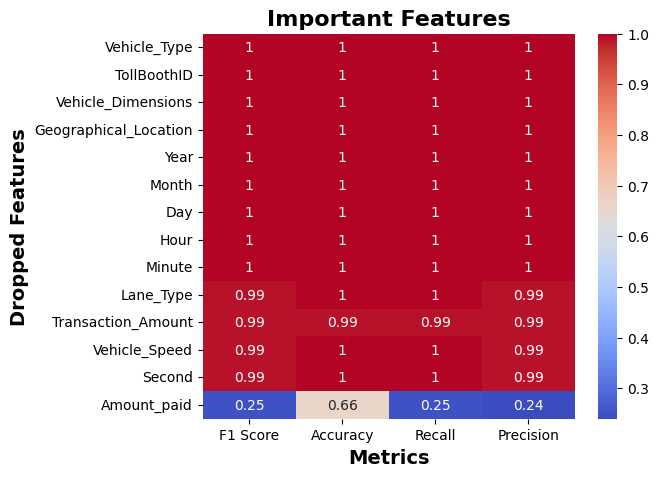

In [45]:
plt.figure(figsize=(6, 5))
plt.title('Important Features', fontsize=16, fontweight='bold')
sns.heatmap(df_final, annot=True, cmap='coolwarm', fmt='g')
plt.xlabel('Metrics', fontsize=14, fontweight='bold')
plt.ylabel('Dropped Features', fontsize=14, fontweight='bold')

plt.show()

**SAVING THE BEST MODEL**

In [46]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')
print(f'Accuracy: {accuracy}')
pickle.dump(model, open('DTC_model.pkl','wb'))
print('Model Saved')

Precision: 0.9908256880733946
Recall: 0.9953917050691244
F1: 0.9931034482758622
Accuracy: 0.997
Model Saved
